#### PCA, K-means and plotting
In this notebook, we wanted to compare the results obtained from performing pca and hierarchical clustering with those obtained from using kmeans as the clustering method. We found that the plots look identically. We did not implement the functions into our python packages or optimized the code to avoid User/FutureWarnings, as the plot was just generated for verification in our report.

In [6]:
import numpy as np
import data_cleanup as dc
import data_exploration as de
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

aa = pd.read_csv('../DMS_data/aminoacids.csv')

gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
norm_frame = dc.aufteilung_mut_pos(dc.norm(gia_null_eto))

In [7]:
dist_chem = de.aa_distance_matrix(aa)
dist_p53_wt = de.dms_distance_matrix_wt(norm_frame)

feature_matrix_p53 = dc.rmv_na(dc.df_transform(dc.norm(gia_null_eto)))

C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

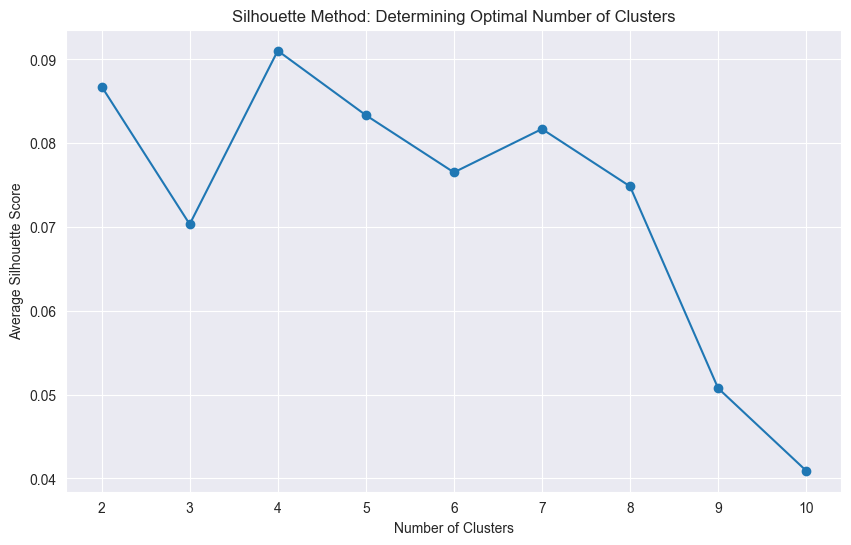

3

In [8]:
def determine_clusters_kmeans(data, max_clusters):
    silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plotting the Silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Method: Determining Optimal Number of Clusters')
    plt.show()

    # Find the optimal number of clusters using the maximum Silhouette score
    optimal_clusters = np.argmax(silhouette_scores) + 1  # Adding 1 to account for zero-based indexing

    return optimal_clusters



num_clusters = determine_clusters_kmeans(feature_matrix_p53, max_clusters=10)
num_clusters

C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ennow\anaconda3\envs\dms\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


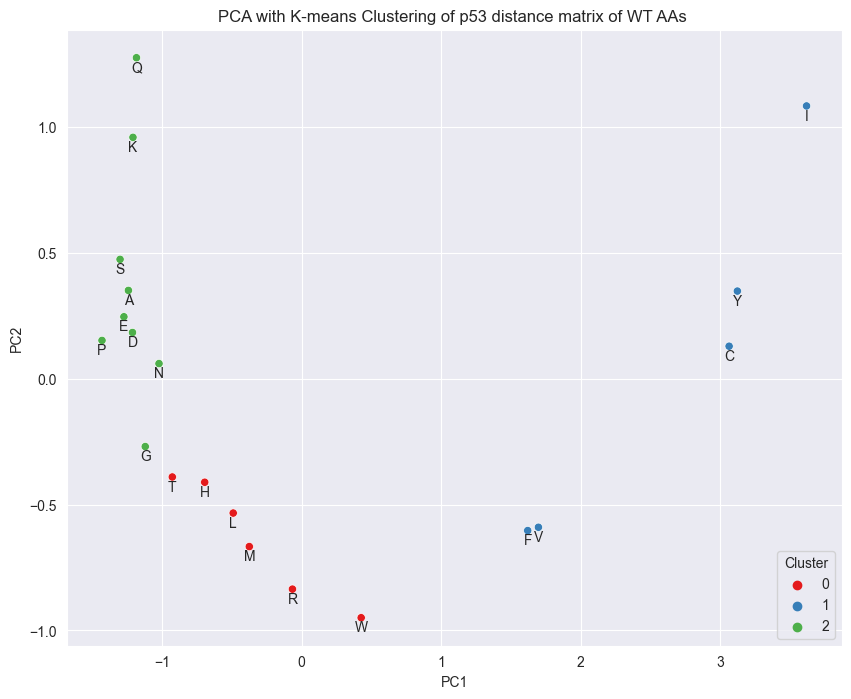

In [9]:
def pca_kmeans_plot (dist_matrix: pd.DataFrame, optimal_num_cluster: int, title: str):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(dist_matrix.values)

    kmeans = KMeans(n_clusters = optimal_num_cluster, random_state=42)
    clusters = kmeans.fit_predict(pca_result)

    df = pd.DataFrame(data = pca_result, columns=['PC1', 'PC2'])
    df['Cluster'] = clusters
    df['Label'] = dist_matrix.index

    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1').set(
    title=f"PCA with K-means Clustering of {title} ")

    for i, point in df.iterrows():
        plt.annotate(point['Label'], (point['PC1'], point['PC2']), textcoords="offset points", xytext=(0, -10), ha='center')

    plt.legend(title='Cluster', loc='lower right')
    return plt.show()

pca_kmeans_plot(dist_p53_wt, num_clusters, title = "p53 distance matrix of WT AAs")